# Aplicaciones de Minería de Datos I
## Lectura 3: Exploración y Visualización de un Conjunto de Datos - Continuación
### Marzo 2023

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import statistics 
import datetime
warnings.filterwarnings('ignore')

#### Introducción a las herramientas

<p>Existen una gran variedad de herramientas para la visualización datos. En esta lectura se utilizará <b>matplotlib</b>, la cual es ampliamente utilizada, por su simplicidad y adecuaciones para visualizar detalle a detalle una gráfica; además de la capacidad de poder almacenar resultados.</p>

<p>En la siguiente gráfica se muestra una comparativa entre <b>SizeOfCode</b>, un campo opcional del PE, que describe el tamaño del código fuente (la suma de todas las secciones de código) y el tipo de malware.</p>

 <p>Este tipo de gráfico es denominado <b>scatter</b> y sirve para visualizar la relación entre dos pares de valores en el conjunto de datos.</p>

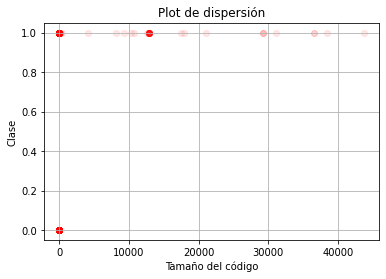

In [4]:
dataset = pd.read_csv('../datasets/dataset_malwares.csv',sep=',')
dataset = dataset.drop(columns=['Name'])
y = dataset['Malware']
X = dataset.drop(columns=['Malware'])

plt.scatter(X['e_cparhdr'],y,color='red',marker='o',linestyle='solid',alpha=0.09)
plt.title("Plot de dispersión")
plt.xlabel('Tamaño del código')
plt.ylabel('Clase')
plt.grid()
plt.savefig("scatter.png",dpi=300)
plt.show()


#### Valores estadísticos

<p>Por otro lado <b>Seaborn</b>, es otra biblioteca basada en <b>matplotlib</b>, con interfaces y desarrollo de gráficos más atractivos y estadísticamente informativos.</p>

Si Python3 es el interprete por defecto:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font color = "green">pip install seaborn</font><br>
</div>
Si Python3 no es el interprete por defecto:
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font color = "green">pip3 install seaborn</font><br>
</div>

<p>Se observa un valor mínimo de cero en el tamaño del código. **¿Será eso posible?, ¿Será algo malicioso?** Este artículo lo aborda: [Benign and malware file size normalization ](https://www.researchgate.net/figure/Benign-and-malware-file-size-normalization_tbl2_220283798)</p>
<p>Si se pude reducir el número de valores o segmentarlos se podría observar que gran parte de las muestras oscilan entre los valores 0 y 7680.</p>

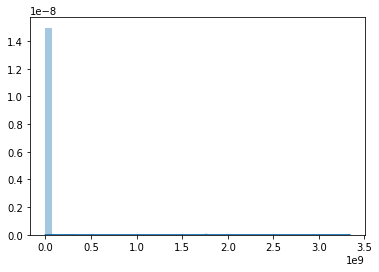

In [6]:
X['SizeOfCode'].values.sort()
sns.distplot(X['SizeOfCode'].values);

### Oblicuidad (Asimetría) y Kurtosis

<p>
    <ul>
<li> La oblicuidad (asimetría) se usa para obtener probabilidades aproximadas de las distribuciones, es decir que tan simétricas son, el valor representa  desde donde parte el número horizontal de la simetría. </li>

<li>La kurtosis (o apuntamiento) es una medida de forma que mide cuán escarpada o achatada está una curva o distribución.</li>
        </ul>
</p>

In [7]:
print("Oblicuidad: %f" % X['SizeOfCode'].skew())
print("Kurtosis: %f" % X['SizeOfCode'].kurt())

Oblicuidad: 46.199654
Kurtosis: 2394.381146


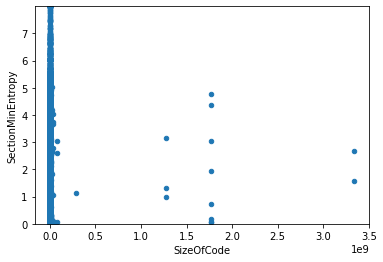

In [8]:
var = 'SectionMinEntropy'
data = pd.concat([X[var],X['SizeOfCode']], axis=1)
data.plot.scatter(x='SizeOfCode', y=var, ylim=(0,max(X[var])));

### Matriz de correlación(Sopa de plasma)

<p>En estadística, una correlación es una medida que expresa el grado en que dos variables están linealmente relacionadas, es decir que tanto pudieran cambiar en un rango constante.</p>

<p>Una matriz de correlación es un cuadrado donde las diferentes características del conjunto de datos se muestras en filas/columnas. Muestra la correlación entre cada muestra y en la línea diagonal la correlación perfecta cuando la característica se compara consigo misma:</p>

<ol>
<li>	Un valor de -1 indica que hay una correlación lineal perfecta de manera negativa entre dos variables</li>
<li>	Un valor de 0 indica que no hay una correlación lineal entre variables</li>
<li>	Un valor de 1 indica una correlación positiva perfecta entre dos variables</li>
</ol>

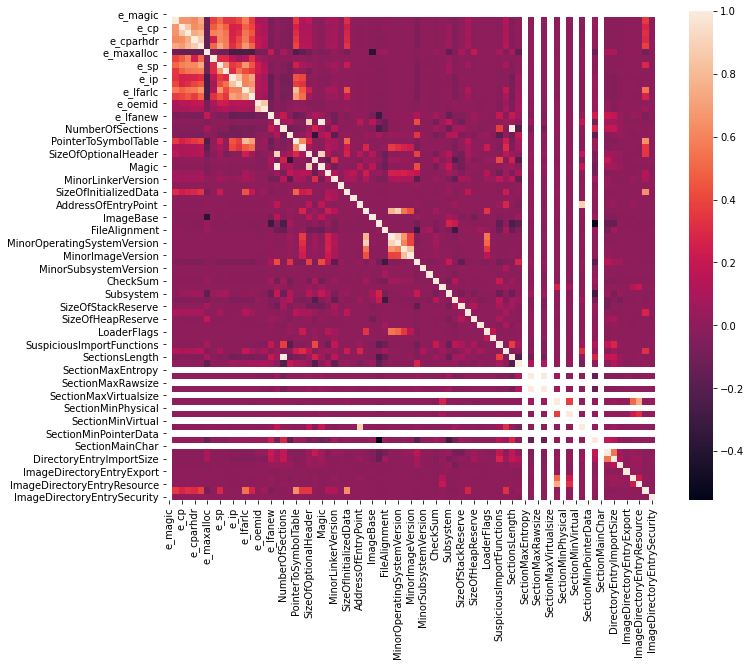

In [9]:
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);
plt.savefig('corr.png',dpi=300)

<p>La matriz anterior se representa mediante un mapa de calor, los colores que tienden patrones más oscuros reflejan correlaciones negativas y los claros correlaciones positivas. Es importante observar que existen bastantes características con correlación positiva con respecto a otras. Por ejemplo, los valores de entropía (<b>SectionMinEntropy</b>) tienen correlación positiva con la mayoría de las características, una ligera variación y los valores podrían cambiar radicalmente.</p>

### La bola de cristal

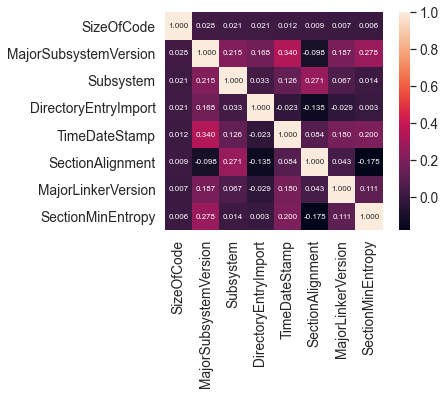

In [10]:
k = 8
cols = corrmat.nlargest(k, 'SizeOfCode')['SizeOfCode'].index
cm = np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size':8}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('bolacristal.png',dpi=300)
plt.show()

<p>Si se grafican, por ejemplo, solo diez características relacionadas con la caracterñística *SizeOfCode* se puede observar que tiene una correlación nula en comparación con las demás.</p>

<p>Se podría decir que es una característica ideal para trabajar ya que los cambios en los valores de la misma no afectarán el comportamiento de las demás.</p>

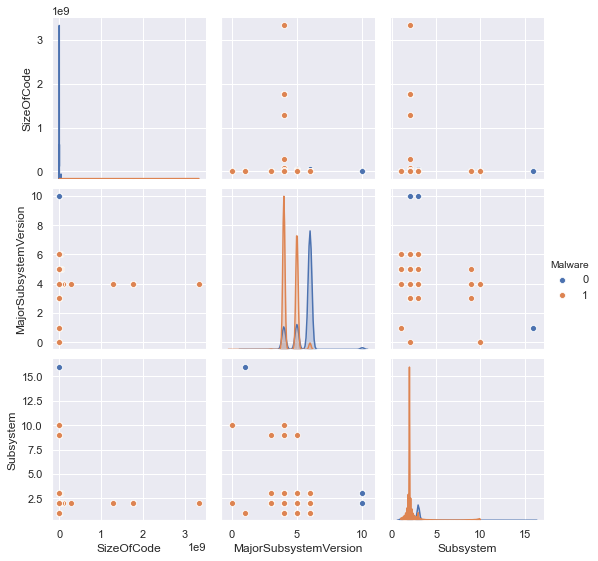

In [11]:
sns.set()
cols = ['SizeOfCode', 'MajorSubsystemVersion','Subsystem','Malware']
sns.pairplot(dataset[cols], size = 2.5,hue='Malware')
plt.show();

<p>El cálculo del sesgo-varianza puede útil para mostrar las tendencias del conjunto de datos.</p>

<p><b>¿Pero qué es el sesgo?</b> Es una de las terminologías más importantes de Ciencia de Datos, la cual describe el fenómeno que ocurre cuando un algoritmo produce resultados perjudiciales que de manera sistemática afectan el proceso de aprendizaje.</p>

<p>La varianza y el desempeño de un modelo están íntimamente conectadas.</p>

<p>De manera ideal es preferible un modelo con bajo sesgo y baja varianza, aunque en la práctica, suele ser un reto. De hecho, es uno de los objetivos principales de un modelo de aprendizaje, es decir, reducir el sesgo incrementando un poco la varianza o de manera inversa incrementar la varianza para reducir el sesgo.</p>

<p>Lo anterior se describe como la balanza o compensación del sesgo-varianza.</p>

<p>El error total que se puede minimizar la balanza se define como:</p>

\begin{equation}
error_{total} = Sesgo^2 + Varianza + Error_{irreducible}
\end{equation}


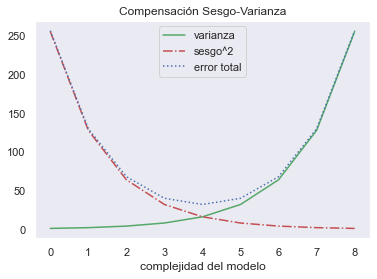

In [12]:
varianza = [1,2,4,8,16,32,64,128,256]
sesgo_al_cuadrado = [256,128,64,32,16,8,4,2,1]
error_total = [x + y for x,y in zip(varianza,sesgo_al_cuadrado)]
xs = [i for i,_ in enumerate(varianza)]

plt.plot(xs,varianza,'g-',label='varianza')
plt.plot(xs,sesgo_al_cuadrado,'r-.',label='sesgo^2')
plt.plot(xs,error_total,'b:',label='error total')
plt.grid()
plt.xlabel("complejidad del modelo")
plt.title("Compensación Sesgo-Varianza")
plt.legend()
plt.show()

### Conjunto de datos de CVE

<i>Common Vulnerabilities and Exposures</i> son una lista de brechas de seguridad públicamente demostradas y categorizadas [cve](https://cve.mitre.org/):

<p>Las características del conjunto de datos son:</p>

<ol>
<li>	Índice: el identificador propuesto por CVE para cada vulnerabilidad: CVE-AÑO-NUMERO_DE_LA_VULNERABILIDAD </li>
    <li>	<i>mod_date</i>: fecha de modificación de la vulnerabilidad</li>
    <li>	<i>pub_date</i>: fecha de publicación de la vulnerabilidad</li>
    <li>	<i>cvss</i> (Common Vulnerability Scoring System): es un sistema de puntaje para caracterizar la severidad de una vulneabilidad en el rango de $\{0,10\}$, en orden ascendente de impacto de la vulnerabilidad [CVSS](https://nvd.nist.gov/vuln-metrics/cvss/v3-calculator)</li>
    <li>	<i>cwe_code</i>  (Common Weakness Enumeration): es el código asociado a una taxonomía de debilidades de seguridad ya identificadas por el MITRE [CWE](https://cwe.mitre.org/)</li>
    <li>	<i>cwe_name</i>: es el nombre asociado a una taxonomía de debilidades de seguridad ya identificadas por el MITRE</li>
    <li>	<i>summary</i>: resumen de la vulnerabilidad</li>
</ol>

In [14]:
dataset_cve = pd.read_csv('../datasets/cve.csv')
dataset_cve[dataset_cve['cvss']==10.0]

Unnamed: 0        mod_date        pub_date  cvss  cwe_code  \
28      CVE-2011-2921  19/11/19 18:43  19/11/19 17:15  10.0       273   
147    CVE-2019-15800  14/11/19 21:21  14/11/19 21:15  10.0        20   
191     CVE-2013-3073  14/11/19 19:34  14/11/19 18:15  10.0        22   
280     CVE-2019-8248  14/11/19 16:53  14/11/19 16:15  10.0       119   
281     CVE-2019-8247  14/11/19 16:53  14/11/19 16:15  10.0       119   
...               ...             ...             ...   ...       ...   
89544   CVE-2002-2365  05/09/08 20:33   31/12/02 5:00  10.0        20   
89589   CVE-2002-2236  05/09/08 20:32   31/12/02 5:00  10.0        20   
89597   CVE-2002-1874  05/09/08 20:31   31/12/02 5:00  10.0        20   
89628   CVE-2007-1383   05/09/08 4:00   10/03/07 0:19  10.0       189   
89636   CVE-2005-1812   05/09/08 4:00   01/06/05 4:00  10.0       119   

                                                cwe_name  \
28                 Improper Check for Dropped Privileges   
147                            Improper Input Validation   
191     Improper Limitation of a Pathname to a Restri...   
280     Improper Restriction of Operations within the...   
281     Improper Restriction of Operations within the...   
...                                                  ...   
89544                          Improper Input Validation   
89589                          Improper Input Validation   
89597                          Improper Input Validation   
89628                                     Numeric Errors   
89636   Improper Restriction of Operations within the...   

                                                 summary  
28     ktsuss versions 1.4 and prior has the uid set ...  
147    An issue was discovered on Zyxel GS1900 device...  
191    A Symlink Traversal vulnerability exists in NE...  
280    Adobe Illustrator CC versions 23.1 and earlier...  
281    Adobe Illustrator CC versions 23.1 and earlier...  
...                                                  ...  
89544  Simple WAIS (SWAIS) 1.11 allows remote attacke...  
89589  Format string vulnerability in the awp_log fun...  
89597  astrocam.cgi in AstroCam 0.9-1-1 through 1.4.0...  
89628  Integer overflow in the 16 bit variable refere...  
89636  Multiple stack-based buffer overflows in Futur...  

[4496 rows x 7 columns]

In [15]:
dataset_cve.describe()

cvss      cwe_code
count  89660.000000  89660.000000
mean       6.021429    199.690854
std        1.994757    176.177244
min        0.000000      1.000000
25%        4.300000     79.000000
50%        5.800000    119.000000
75%        7.500000    284.000000
max       10.000000   1188.000000

In [16]:
dataset_cve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89660 entries, 0 to 89659
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  89660 non-null  object 
 1   mod_date    89660 non-null  object 
 2   pub_date    89660 non-null  object 
 3   cvss        89660 non-null  float64
 4   cwe_code    89660 non-null  int64  
 5   cwe_name    89660 non-null  object 
 6   summary     89660 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.8+ MB


In [17]:
# Seleccionar las columnas de interés del dataset
dataset_cve_cvss = dataset_cve[['Unnamed: 0','cvss','cwe_name','pub_date']].head()
# Invocar el método style y el método highlight_max, para resaltar los valores más grandes
dataset_cve_cvss.style.highlight_max(color='red')

In [20]:
# El atributo values de la biblioteca pandas, transforma una serie en una lista
#fechas_anio = dataset_cve_cvss["pub_date"].values
fechas_anio = [datetime.datetime.strptime(fecha,'%d/%m/%y %H:%M').year for fecha in dataset_cve["pub_date"].values]

In [21]:
#fechas_anio

In [22]:
# %d/%m/%y %H:M
#fecha_prueba = datetime.datetime.strptime('21/11/19 15:15','%d/%m/%y %H:%M')
#print(fecha_prueba.hour)

In [23]:
#crear un objeto tipo DataFrame
fechas_df = pd.DataFrame(fechas_anio,columns=['anio'])

In [24]:
fechas_df

anio
0      2019
1      2019
2      2019
3      2019
4      2019
...     ...
89655  2007
89656  2007
89657  2007
89658  2007
89659  2007

[89660 rows x 1 columns]

In [25]:
# método groupby agrupa por el nombre de una columna a las muestras y el método count cuenta la
# frecuencia de cada fecha única
# keys() es el nombre del valor 
# tolist() el vallor
# key: 1999 tolist(): 46
fechas_df.groupby('anio').anio.count()

anio
1999       46
2000       18
2001       34
2002      217
2003      245
2004      147
2005      356
2006      864
2007     2435
2008     4991
2009     4909
2010     3755
2011     3396
2012     4135
2013     4125
2014     6825
2015     5217
2016     5325
2017    12965
2018    14855
2019    14800
Name: anio, dtype: int64

In [26]:
anios = fechas_df.groupby('anio').anio.count().keys()
frecuencia = fechas_df.groupby('anio').anio.count().tolist()

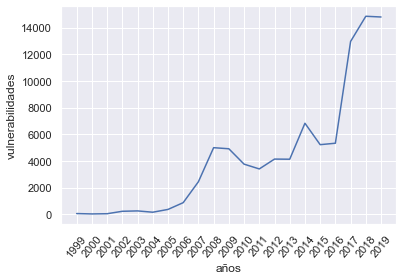

In [29]:
figura = sns.lineplot(anios,frecuencia);
figura.set(xlabel='años', ylabel='vulnerabilidades')
figura.set_xticklabels(anios,rotation=50)
plt.xticks(anios)
plt.show()

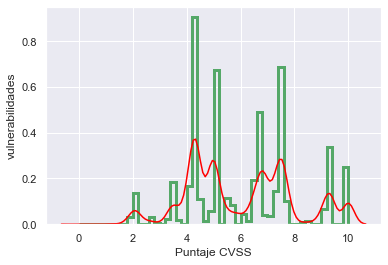

In [30]:
#histtype: tipo de histograma
# linewidth: ancho de la línea
# alpha: opacidad
# color: color del histograma, donde g es "green"
# kws -> key:word arguments
figura = sns.distplot(dataset_cve['cvss'],color="red",hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"});
figura.set(xlabel='Puntaje CVSS', ylabel='vulnerabilidades');

In [31]:
# La documentación de una clase, función o método
#help(sns.distplot)

In [32]:
# Concat concatena n número de columnas en un solo DataFrame,
# siempre y cuando sean de la misma longitud
vulnerabilidades_df = pd.concat([dataset_cve['cwe_name'],fechas_df['anio']],axis=1)

In [33]:
vulnerabilidades_df.groupby(['cwe_name','anio']).anio.count()

cwe_name                                    anio
 7PK - Code Quality                         2018     1
 7PK - Errors                               2006     1
                                            2016     9
                                            2017    10
                                            2018    22
                                                    ..
 XML Injection (aka Blind XPath Injection)  2013     1
                                            2016     1
                                            2017     7
                                            2018     8
                                            2019    14
Name: anio, Length: 916, dtype: int64

In [34]:
pd.DataFrame(vulnerabilidades_df.groupby(['cwe_name','anio']).anio.count()).to_csv('vulns.csv')